<a href="https://colab.research.google.com/github/UnnatiChitra/Linear-Regression/blob/main/Linear_regression_using_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df= pd.read_csv('Salary_dataset.csv')
df=df.iloc[:,1:]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


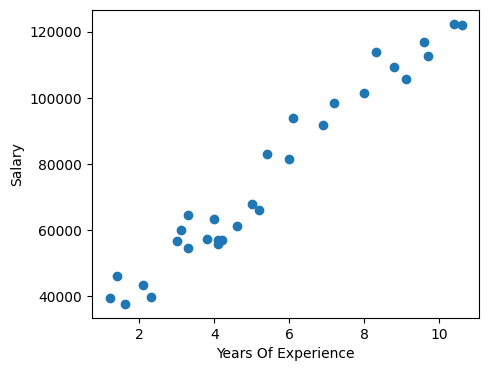

In [118]:
plt.figure(figsize=(5,4))
plt.scatter(x=df.iloc[:,0],y=df.iloc[:,-1])
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [119]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
X=df.iloc[:,[0]].values
y=df.iloc[:,[-1]].values
reg.fit(X,y)

LinearRegression()

In [120]:
reg.coef_

array([[9449.96232146]])

In [121]:
reg.intercept_

array([24848.20396652])

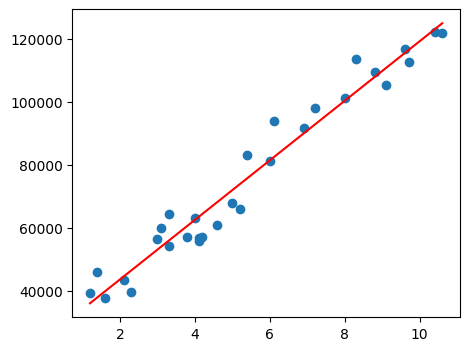

In [122]:
plt.figure(figsize=(5,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [126]:
y_pred = ((500 * X) + 10000).reshape(-1,1)

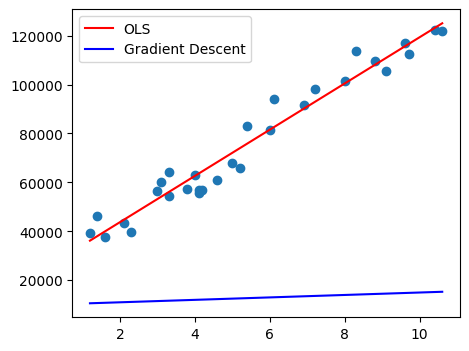

In [127]:
plt.figure(figsize=(5,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='blue', label='Gradient Descent')
plt.legend()
plt.show()

In [128]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=2)

In [129]:
class GDRegressor():

  def __init__(self,learning_rate,epochs):
        self.m = 500
        self.b = 10000
        self.lr = learning_rate
        self.epochs = epochs

  def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

  def predict(self, X):
    return self.m*X + self.b

In [130]:
gd=GDRegressor(0.000000001,1000000)
gd.fit(X_train,y_train)

7618.682581196997 24432.784469887407


In [131]:
y_pred = gd.predict(X_test).reshape(-1,1)
y_pred

array([[35098.94008356],
       [33575.20356732],
       [59478.72434339],
       [53383.77827844],
       [79287.29905451],
       [70906.74821519]])

In [132]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6481114221551989

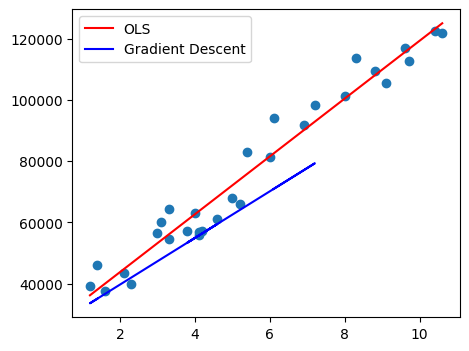

In [133]:
plt.figure(figsize=(5,4))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X_test,y_pred,color='blue', label='Gradient Descent')
plt.legend()
plt.show()